In [3]:
# Define SMILES strings
smiles_list = [
    "CCO",        # Ethanol
    "CCC=O",      # Propanal
    "CCN(CC)CC",  # Diethylamine
    "C1CCCCC1",   # Cyclohexane
    "c1ccccc1",   # Benzene
    "C1=NC=CN=C1",# Pyridine
    "C1CNCCN1"    # Piperazine
]

# Write to a CSV file
with open("smiles.csv", "w") as file:
    file.write("smiles\n")  # Header
    for smiles in smiles_list:
        file.write(f"{smiles}\n")

print("smiles.csv file created successfully.")


smiles.csv file created successfully.


In [5]:
import pandas as pd
from rdkit import Chem

# Step 1: Read the CSV file
df = pd.read_csv('smiles.csv')  # Replace 'smiles.csv' with your actual file path

# Step 2: Convert SMILES to RDKit Mol objects and add the ROMol column
df['ROMol'] = df['smiles'].apply(lambda x: Chem.MolFromSmiles(x))

# Step 3: Add the n_atoms column by counting the number of atoms in each molecule
df['n_atoms'] = df['ROMol'].apply(lambda mol: mol.GetNumAtoms() if mol else None)

# Step 4: Remove rows with invalid SMILES
df = df[df['ROMol'].notnull()]

# Step 5: Save the processed DataFrame to a new CSV file
df.to_csv('processed_smiles.csv', index=False)

# Step 6: Print the first few rows of the processed DataFrame
print(df.head())


      smiles                                             ROMol  n_atoms
0        CCO  <rdkit.Chem.rdchem.Mol object at 0x15395fb1ad60>        3
1      CCC=O  <rdkit.Chem.rdchem.Mol object at 0x15395fb1ac10>        4
2  CCN(CC)CC  <rdkit.Chem.rdchem.Mol object at 0x15395fb1aba0>        7
3   C1CCCCC1  <rdkit.Chem.rdchem.Mol object at 0x15395fb1a820>        6
4   c1ccccc1  <rdkit.Chem.rdchem.Mol object at 0x15395fb1a580>        6


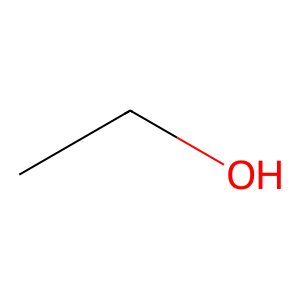

In [6]:
from rdkit.Chem import Draw

# Example: Display the first molecule
Draw.MolToImage(df['ROMol'][0])


In [1]:
import os
import sys
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import PandasTools
from psikit import Psikit

# Load the CSV file containing SMILES strings
smiles_df = pd.read_csv('smiles.csv')

# Display the first few rows of the DataFrame
print("Initial DataFrame:")
print(smiles_df.head(10))

# Add a molecule column to the DataFrame
PandasTools.AddMoleculeColumnToFrame(smiles_df, smilesCol='smiles')

# Display the updated DataFrame with molecule column
print("\nDataFrame after adding molecule column:")
print(smiles_df.head(10))

# Count the number of atoms for each molecule and store it in a new column
smiles_df["n_Atoms"] = smiles_df['ROMol'].map(lambda x: x.GetNumAtoms())

# Display the updated DataFrame with atom counts
print("\nDataFrame with atom counts:")
print(smiles_df.head(10))

# Initialize Psikit with specific settings
pk = Psikit(debug=True, threads=1, memory=32)

# List to store energies
energies = []

# Iterate through each SMILES string in the DataFrame
for smiles in smiles_df["smiles"]:
    pk.read_from_smiles(smiles)  # Read the molecule from SMILES
    print(f"Optimizing structure for SMILES: {smiles}")
    
    # Time the optimization and store the result
    %time energy = pk.optimize()
    
    # Append the energy result to the list
    energies.append(energy)

# Add the energies to the DataFrame
smiles_df["energy"] = energies

# Display the final DataFrame with calculated energies
print("\nFinal DataFrame with calculated energies:")
print(smiles_df.head(10))

# Optionally save the updated DataFrame to a new CSV file
smiles_df.to_csv('smiles_with_energies.csv', index=False)
print("\nUpdated DataFrame saved to 'smiles_with_energies.csv'.")


Initial DataFrame:
        smiles
0          CCO
1        CCC=O
2    CCN(CC)CC
3     C1CCCCC1
4     c1ccccc1
5  C1=NC=CN=C1
6     C1CNCCN1

DataFrame after adding molecule column:
        smiles                                             ROMol
0          CCO  <rdkit.Chem.rdchem.Mol object at 0x150337140120>
1        CCC=O  <rdkit.Chem.rdchem.Mol object at 0x150337140e40>
2    CCN(CC)CC  <rdkit.Chem.rdchem.Mol object at 0x150337140f90>
3     C1CCCCC1  <rdkit.Chem.rdchem.Mol object at 0x1503370ea120>
4     c1ccccc1  <rdkit.Chem.rdchem.Mol object at 0x1503370ea2e0>
5  C1=NC=CN=C1  <rdkit.Chem.rdchem.Mol object at 0x1503370ea350>
6     C1CNCCN1  <rdkit.Chem.rdchem.Mol object at 0x1503370ea3c0>

DataFrame with atom counts:
        smiles                                             ROMol  n_Atoms
0          CCO  <rdkit.Chem.rdchem.Mol object at 0x150337140120>        3
1        CCC=O  <rdkit.Chem.rdchem.Mol object at 0x150337140e40>        4
2    CCN(CC)CC  <rdkit.Chem.rdchem.Mol object at 